## Principal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analysing data much easier and faster for machine learning algorithms without extraneous variables to process.


So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

## Dimensionality Reduction
There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:
- Feature Elimination
- Feature Extraction

Feature elimination is what it sounds like: we reduce the feature space by eliminating features. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a disadvantage, though, you gain no information from those variables you have dropped. 

Feature extraction, however, does not run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” 

Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. Because these new independent variables are combinations of our old ones, we are still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! 

As an added benefit, each of the “new” variables after PCA are all independent of one another. This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables, this assumption will necessarily be satisfied.

**Data Set Information**

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.


**Features**

|Feature|Description|
|-----|-----|
|category|category of merchants' business|  
|amt|transaction amount|   
|gender|gender of credit card user|  
|state|state in which the person resides|
|city_pop|population in the city| 

In [1]:
#import packages
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA

In [2]:
#reading the file.
df = pd.read_csv('CC_NEW.csv')
df.head()

,category,amt,gender,state,city_pop
0,personal_care,2.86,M,SC,333497
1,personal_care,29.84,F,UT,302
2,health_fitness,41.28,F,NY,34496
3,misc_pos,60.05,M,FL,54767
4,travel,3.19,M,MI,1126


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   category  555719 non-null  object 
 1   amt       555719 non-null  float64
 2   gender    555719 non-null  object 
 3   state     555719 non-null  object 
 4   city_pop  555719 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 21.2+ MB


In [4]:
df1=df.drop(['amt','city_pop'],axis=1)
Amt=df['amt']

### Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values.

In [5]:
one=OneHotEncoder().fit(df1)

In [6]:
En=one.transform(df1)

In [7]:
import pickle as pk 
pk.dump(one, open("one_hot.pkl","wb"))

In [8]:
Df_Encoded=pd.DataFrame(En.toarray(),columns=one.get_feature_names().tolist())

In [9]:
Df_Encoded['city_pop']=df['city_pop']

In [10]:
Df_Encoded

,x0_entertainment,x0_food_dining,x0_gas_transport,x0_grocery_net,x0_grocery_pos,x0_health_fitness,x0_home,x0_kids_pets,x0_misc_net,x0_misc_pos,...,x2_TN,x2_TX,x2_UT,x2_VA,x2_VT,x2_WA,x2_WI,x2_WV,x2_WY,city_pop
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333497
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,302
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34496
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54767
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,519
555715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28739
555716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3684
555717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129


### STEP 1: STANDARDIZATION
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. 

That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.
 
Once the standardization is done, all the variables will be transformed to the same scale.


In [11]:
sc = StandardScaler().fit(Df_Encoded)
Stand_df = sc.transform(Df_Encoded)
df_Scaled = pd.DataFrame(Stand_df,columns=Df_Encoded.columns)
pk.dump(sc, open("scaler.pkl","wb"))

### STEP 2: COVARIANCE MATRIX COMPUTATION
The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. 

Sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix of this from:

![title](https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/Principal%20Component%20Analysis%20Covariance%20Matrix.png)
 
Covariance Matrix for 3-Dimensional Data
Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. 

And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

**What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?**

It is actually the sign of the covariance that matters:

- if positive then: the two variables increase or decrease together (correlated)
- if negative then: One increases when the other decreases (Inversely correlated)

The covariance matrix is nothing more than a table that summaries the correlations between all the possible pairs of variables.



In [12]:
# Creating cov matrix of the our data.
cov_matrix=df_Scaled.cov()
cov_matrix

,x0_entertainment,x0_food_dining,x0_gas_transport,x0_grocery_net,x0_grocery_pos,x0_health_fitness,x0_home,x0_kids_pets,x0_misc_net,x0_misc_pos,...,x2_TN,x2_TX,x2_UT,x2_VA,x2_VT,x2_WA,x2_WI,x2_WV,x2_WY,city_pop
x0_entertainment,1.000002,-0.076902,-0.093703,-0.053079,-0.090131,-0.074132,-0.089934,-0.086426,-0.063472,-0.071834,...,0.000787,-0.002170,-0.001918,0.001899,0.001026,-0.000156,0.002277,-0.001465,-0.001653,-0.000874
x0_food_dining,-0.076902,1.000002,-0.092646,-0.052480,-0.089115,-0.073296,-0.088920,-0.085451,-0.062756,-0.071023,...,-0.002027,-0.000899,-0.003708,0.003092,0.002264,0.000557,0.002519,-0.002378,-0.000652,0.003584
x0_gas_transport,-0.093703,-0.092646,1.000002,-0.063946,-0.108584,-0.089310,-0.108347,-0.104120,-0.076467,-0.086540,...,-0.009149,-0.005310,0.005067,-0.004724,-0.008839,-0.005081,-0.003182,0.000545,-0.006065,-0.020576
x0_grocery_net,-0.053079,-0.052480,-0.063946,1.000002,-0.061508,-0.050590,-0.061374,-0.058980,-0.043315,-0.049022,...,0.007178,0.004717,-0.001808,0.001574,0.003789,0.004924,0.001234,-0.001832,0.001879,0.021078
x0_grocery_pos,-0.090131,-0.089115,-0.108584,-0.061508,1.000002,-0.085905,-0.104216,-0.100151,-0.073552,-0.083241,...,0.001510,0.000406,0.002260,0.002792,0.000130,-0.004383,0.001009,0.000092,0.002338,-0.003473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x2_WA,-0.000156,0.000557,-0.005081,0.004924,-0.004383,-0.000037,-0.002746,-0.003084,0.003211,0.003295,...,-0.014103,-0.034084,-0.011193,-0.018472,-0.011651,1.000002,-0.018369,-0.017170,-0.015131,-0.028336
x2_WI,0.002277,0.002519,-0.003182,0.001234,0.001009,0.000573,0.000202,0.000998,-0.001419,0.002545,...,-0.017479,-0.042243,-0.013872,-0.022894,-0.014441,-0.018369,1.000002,-0.021280,-0.018753,-0.019922
x2_WV,-0.001465,-0.002378,0.000545,-0.001832,0.000092,0.001036,0.002634,0.000339,0.001219,-0.004433,...,-0.016338,-0.039485,-0.012967,-0.021399,-0.013498,-0.017170,-0.021280,1.000002,-0.017529,-0.039045
x2_WY,-0.001653,-0.000652,-0.006065,0.001879,0.002338,0.002611,0.002551,-0.000246,-0.001449,0.002376,...,-0.014398,-0.034797,-0.011427,-0.018859,-0.011895,-0.015131,-0.018753,-0.017529,1.000002,-0.032428


### STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. 

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. 
These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. 

So, the idea is 2-dimensional data gives you 67 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below. 

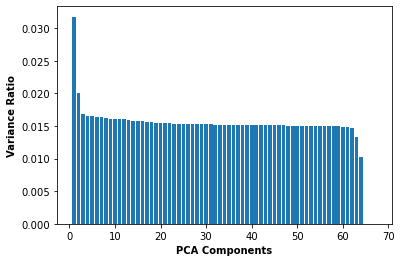

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that the principal components are less interpretable and do not have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a **maximal amount of variance**, that is to say, the lines that capture most information of the data. 

The relationship between variance and information here, is that the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. 

To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.


In [13]:
# Creating eigen vector and valuesof data using linalg.eig
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [14]:
eigen_values

array([ 2.12907092e+00,  1.99840144e-15,  1.34607637e+00,  6.91628371e-01,
       -1.30152007e-15,  1.43089687e-16,  8.96087649e-01,  1.12943819e+00,
        1.10527176e+00,  1.10533802e+00,  1.09908688e+00,  1.09314584e+00,
        1.08405683e+00,  1.07947809e+00,  1.07782868e+00,  1.07516342e+00,
        1.07330264e+00,  1.06980191e+00,  9.83737194e-01,  1.06142904e+00,
        1.05850673e+00,  1.05567956e+00,  1.05164724e+00,  1.04300906e+00,
        9.99234627e-01,  1.03551275e+00,  1.03449150e+00,  1.00018916e+00,
        1.03217949e+00,  1.03151384e+00,  1.00144250e+00,  1.00264874e+00,
        1.00340996e+00,  1.02940096e+00,  1.02848839e+00,  1.00414826e+00,
        1.02692392e+00,  1.00586295e+00,  1.00640924e+00,  1.00765851e+00,
        1.00888137e+00,  1.00894589e+00,  1.00937230e+00,  1.00976823e+00,
        1.01010614e+00,  1.01079783e+00,  1.02409837e+00,  1.01213548e+00,
        1.01254282e+00,  1.01339109e+00,  1.02348458e+00,  1.01444347e+00,
        1.02262544e+00,  

In [15]:
eigen_vectors

array([[ 2.69186758e-02, -2.69417104e-01, -1.68572646e-03, ...,
         7.26816369e-03,  9.45009026e-03, -2.18431553e-04],
       [ 1.36111798e-02, -2.66810243e-01, -1.63165432e-02, ...,
        -3.72669020e-02,  1.38050532e-02,  1.04472118e-02],
       [-4.78669900e-03, -3.14336386e-01,  1.18682820e-01, ...,
         1.34927779e-02,  7.13433092e-03, -4.63522362e-03],
       ...,
       [-4.92524364e-02, -2.75926368e-16,  9.75198404e-02, ...,
         1.45587479e-01, -2.88475402e-01,  3.76655460e-01],
       [-8.17350468e-03, -3.14060132e-16,  6.85903748e-02, ...,
        -1.36798807e-01,  1.85424141e-03,  2.45386196e-02],
       [-5.34362581e-02,  8.25290720e-17, -6.74425032e-01, ...,
        -9.01153470e-03, -1.63585243e-03, -1.32073801e-02]])

### HOW PCA CONSTRUCTS THE PRINCIPAL COMPONENTS
As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. 

For example, let us assume that the scatter plot of our data set is as shown below.

The first principal component is approximately the line that matches the purple marks because it goes through the origin, and it is the line in which the projection of the points (red dots) is the most spread out. 

Or mathematically speaking, it is the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).



![SegmentLocal](https://i.gifer.com/H7zW.gif)

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.
Now back to eigenvectors and eigenvalues. 

Eigenvectors and eigenvalues always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

It is eigenvectors and eigenvalues who are behind all the magic explained above, because 
- the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. 

- And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.


**Our data set is 2-dimensional with 67 variables x,y and that the eigenvectors and eigenvalues of the covariance matrix are as follows:**

In [16]:
print('Eigen Values are (λ):',eigen_values)

Eigen Values are (λ): [ 2.12907092e+00  1.99840144e-15  1.34607637e+00  6.91628371e-01
 -1.30152007e-15  1.43089687e-16  8.96087649e-01  1.12943819e+00
  1.10527176e+00  1.10533802e+00  1.09908688e+00  1.09314584e+00
  1.08405683e+00  1.07947809e+00  1.07782868e+00  1.07516342e+00
  1.07330264e+00  1.06980191e+00  9.83737194e-01  1.06142904e+00
  1.05850673e+00  1.05567956e+00  1.05164724e+00  1.04300906e+00
  9.99234627e-01  1.03551275e+00  1.03449150e+00  1.00018916e+00
  1.03217949e+00  1.03151384e+00  1.00144250e+00  1.00264874e+00
  1.00340996e+00  1.02940096e+00  1.02848839e+00  1.00414826e+00
  1.02692392e+00  1.00586295e+00  1.00640924e+00  1.00765851e+00
  1.00888137e+00  1.00894589e+00  1.00937230e+00  1.00976823e+00
  1.01010614e+00  1.01079783e+00  1.02409837e+00  1.01213548e+00
  1.01254282e+00  1.01339109e+00  1.02348458e+00  1.01444347e+00
  1.02262544e+00  1.02209304e+00  1.02196784e+00  1.01497990e+00
  1.01554145e+00  1.01631510e+00  1.02099547e+00  1.01716954e+00
  1

In [17]:
print('Eigen Vector for 1st component:(v1)', eigen_vectors[0])
print('Eigen Vector for 2nd component:(v2)', eigen_vectors[1])

Eigen Vector for 1st component:(v1) [ 2.69186758e-02 -2.69417104e-01 -1.68572646e-03  7.08330342e-04
 -5.73834463e-03 -4.20599432e-03 -2.66815538e-02 -1.58710806e-02
 -1.25947047e-01  6.50590578e-02  6.47918527e-02  2.45724393e-01
  2.28177302e-01 -7.17467294e-01 -4.49702078e-02  4.41353861e-01
  8.36576542e-02  9.52752961e-02 -2.47817987e-02 -5.77979200e-02
  1.25151183e-01  5.61877061e-02  4.18534100e-02 -1.18712342e-01
  1.56935264e-02 -4.34400179e-04 -6.88394109e-02 -2.66960169e-02
  1.88237802e-02  1.34780520e-02  1.00240543e-03  7.96872095e-03
 -5.23818485e-02 -3.06768620e-03 -1.55704539e-02 -1.56076971e-02
 -5.38217973e-02 -1.14111917e-03 -3.22594078e-02  8.29735754e-03
 -1.43568906e-02  3.21735885e-03 -9.46379233e-03  2.71409292e-02
  1.01704544e-02 -2.91074446e-03  2.38477123e-02  2.35929505e-02
 -1.74088771e-02  2.20197233e-02 -2.97553610e-03 -1.02890785e-02
  1.74812286e-02  2.20300045e-02 -1.26626427e-02 -4.96893146e-03
  2.16752563e-02  3.08655791e-02 -1.00250265e-02 -4.33

In [18]:
sorted_components = np.argsort(eigen_values)[::-1]
sorted_components

array([ 0,  2,  7,  9,  8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 25, 26, 28, 29, 33, 34, 36, 46, 50, 52, 53, 54, 58, 61, 66, 65,
       64, 63, 62, 60, 59, 57, 56, 55, 51, 49, 48, 47, 45, 44, 43, 42, 41,
       40, 39, 38, 37, 35, 32, 31, 30, 27, 24, 18,  6,  3,  1,  5,  4],
      dtype=int64)

In [19]:
explained_variance =eigen_values[sorted_components]
explained_variance[0:2]

array([2.12907092, 1.34607637])

In [20]:
explained_variance_ratio = explained_variance /eigen_values.sum()
explained_variance_ratio[0:2]*100

array([3.17771207, 2.0090656 ])

If we rank the eigenvalues in descending order, we get λ1>λ3, which means that the eigenvector that corresponds to the first principal component (PC1) is v1 and the one that corresponds to the second component (PC3) is v3 and so on.

After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. If we apply this on the example above, we find that PC1 and PC2 carry respectively 3% and 2% of the variance of the data.

### STEP 4: FEATURE VECTOR
As we saw in the previous step, computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. 

In this step, we to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.


In [21]:
projection_matrix = eigen_vectors
projection_matrix

array([[ 2.69186758e-02, -2.69417104e-01, -1.68572646e-03, ...,
         7.26816369e-03,  9.45009026e-03, -2.18431553e-04],
       [ 1.36111798e-02, -2.66810243e-01, -1.63165432e-02, ...,
        -3.72669020e-02,  1.38050532e-02,  1.04472118e-02],
       [-4.78669900e-03, -3.14336386e-01,  1.18682820e-01, ...,
         1.34927779e-02,  7.13433092e-03, -4.63522362e-03],
       ...,
       [-4.92524364e-02, -2.75926368e-16,  9.75198404e-02, ...,
         1.45587479e-01, -2.88475402e-01,  3.76655460e-01],
       [-8.17350468e-03, -3.14060132e-16,  6.85903748e-02, ...,
        -1.36798807e-01,  1.85424141e-03,  2.45386196e-02],
       [-5.34362581e-02,  8.25290720e-17, -6.74425032e-01, ...,
        -9.01153470e-03, -1.63585243e-03, -1.32073801e-02]])

we can either form a feature vector with all of the eigenvectors v1 to v67:
 
Or discard the eigenvector which are lesser significance, and form a feature vector with significant vectors only:
 
Discarding the eigenvector v61 to v67 will reduce dimensionality by 7 and will consequently cause a loss of information in the final data set. But given that v60 to v67 was carrying only 6% of the information, the loss will be therefore not important, and we will still have 94% of the information that is carried by v1 to v60.

So, it is up to you to choose whether to keep all the components or discard the ones of lesser significance, depending on what you are looking for. Because if you just want to describe your data in terms of new variables (principal components) that are uncorrelated without seeking to reduce dimensionality, leaving out lesser significant components is not needed.


### LAST STEP: RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES
In the previous steps, apart from standardization, you do not make any changes on the data, you just select the principal components and form the feature vector, but the input data set remains always in terms of the original axes (i.e., in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.
 
 


In [22]:
FinalDataset=np.dot(projection_matrix,df_Scaled.T)

In [23]:
col=[]
for i in range(FinalDataset.shape[0]):
    col.append('V{}'.format(i+1))

In [24]:
FinalDataset=pd.DataFrame(FinalDataset.T,columns=col)

In [25]:
FinalDataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67
0,0.776151,0.783328,-0.881891,-0.203527,-0.061815,-0.704985,-0.318663,2.955357,0.334390,-0.124678,...,1.611323,0.111178,-1.032404,0.511098,0.934331,0.884625,0.048498,0.638831,1.428828,0.318401
1,-0.643130,-1.157058,-0.372692,0.174774,0.089012,0.154345,0.286014,3.168103,-0.384322,-0.270735,...,1.053769,0.351510,0.535760,-0.034846,-0.862331,0.685514,1.878053,-2.202436,1.664917,0.262988
2,-0.347505,-1.058766,-0.285491,0.047533,0.249309,0.339574,-0.127842,0.013154,0.412572,-0.080582,...,-2.173892,0.134106,-0.250042,0.698646,-0.402244,-0.648276,0.381917,0.068382,1.080363,0.339542
3,0.914893,1.013300,-0.101473,0.051948,-3.481178,-0.774770,0.544851,0.400521,0.429928,0.621337,...,0.415895,-0.063987,0.040767,0.439662,-0.115762,0.280457,-0.002756,0.211538,0.201601,0.308791
4,-3.563061,3.737387,0.389082,0.212934,0.680173,-1.691578,-0.201866,0.416330,-0.236075,0.625959,...,0.006459,0.247563,0.439468,0.341622,0.027921,0.506872,0.113494,0.233106,0.037351,0.339210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.589129,0.649200,-0.161992,-0.504491,0.495651,-0.540305,0.113484,0.230145,-0.016573,0.159408,...,0.142445,0.011865,4.091017,0.256584,-1.428228,0.991137,-0.167428,0.105368,0.010570,0.363296
555715,0.462420,0.361670,2.823017,-0.542520,-0.018836,-0.531387,-0.722224,-0.103810,0.333015,-0.104148,...,0.011603,0.369418,-0.188015,0.238272,-0.336557,-0.140393,0.275328,-0.750899,-0.284087,0.647393
555716,-0.545120,-1.213008,2.186310,-1.072737,0.245708,0.734363,-0.570452,-0.149839,0.982992,-0.700862,...,0.098865,0.550252,-0.099572,-1.034556,-0.049852,-2.804060,-1.547290,-1.362807,1.161647,0.632442
555717,-3.275040,2.806566,0.029581,-0.853068,0.629312,-1.416521,-0.131896,0.629911,-1.045023,0.132967,...,0.404917,-1.522282,-0.789533,-1.017155,-0.400965,-1.112204,-0.487593,-0.929877,-0.695658,0.749580


### PCA using Scikit-Learn package.

In [26]:
#Transform features
pca = PCA() # Make an instance of the Model.
X_pca = pca.fit_transform(df_Scaled)

### Examine variance explained by each Principal Component

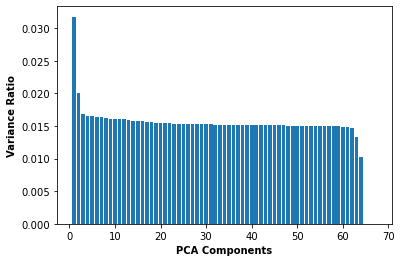

In [27]:
# Variance Ratio bar plot for each PCA components.
import matplotlib.pyplot as plt
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')
plt.savefig('variance.png')

In [28]:
col=[]
for i in range(X_pca.shape[1]):
    col.append('V{}'.format(i+1))

In [29]:
x=np.cumsum(pca.explained_variance_ratio_*100)

In [30]:
Varaince_Explained=pd.DataFrame({'PC':col,'Explained Varaince':pca.explained_variance_ratio_*100,'Cumulative EV':x})

In [31]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
Varaince_Explained

,PC,Explained Varaince,Cumulative EV
0,V1,3.177712e+00,3.177712
1,V2,2.009066e+00,5.186778
2,V3,1.685726e+00,6.872503
3,V4,1.649755e+00,8.522259
4,V5,1.649656e+00,10.171915
5,V6,1.640425e+00,11.812340
6,V7,1.631558e+00,13.443898
7,V8,1.617992e+00,15.061891
8,V9,1.611158e+00,16.673049
9,V10,1.608697e+00,18.281746


Text(0, 0.5, 'Cumulative Explained Variance')

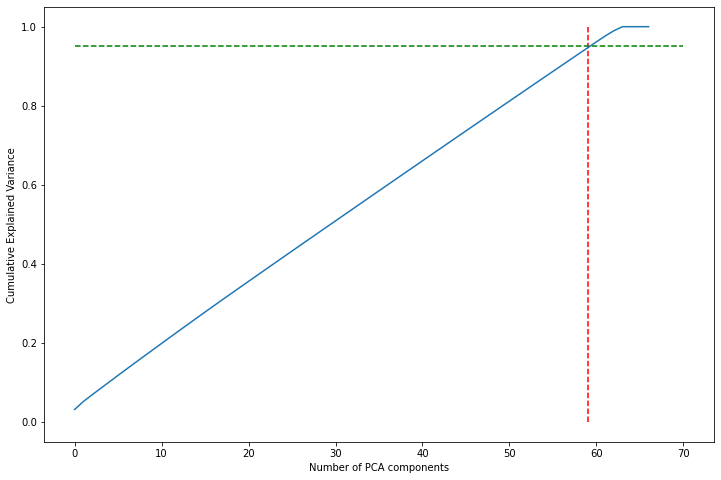

In [32]:
# Scree plot to visualize the Cumulative variance against the Number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=59, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

#### Inference
It is evident from the above Scree plot that more than 95% variance is explained by the first 60 principal components. Hence, we will use these components only going forward.

In [33]:
#Transform features
pca1 = PCA(n_components=28).fit(df_Scaled)# Make an instance of the Model.

In [34]:
pk.dump(pca1, open("PCA.pkl","wb"))

<h1><center>END</center></h1>